# Kaggle 공공데이터 사용

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

insurance = pd.read_csv('/content/drive/My Drive/Classroom/data/insurance.csv', encoding='utf-8')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance_df = pd.DataFrame(data=insurance)
insurance_df['sex'] = insurance_df['sex'].replace({'female':1,'male':0})
insurance_df['smoker'] = insurance_df['smoker'].replace({'yes':1,'no':0})
insurance_df['region'] = insurance_df['region'].replace({'southwest':0,'southeast':1,'northwest':2,'northeast':3})
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [5]:
target = []
for i in insurance_df['charges']:
  if i > 35000:
    target.append(1)
  elif i > 16639:
    target.append(2)
  elif i > 9382:
    target.append(3)
  else:
    target.append(4)

insurance_df['target'] = target

In [6]:
insurance_df

,age,sex,bmi,children,smoker,region,charges,target
0,19,1,27.900,0,1,0,16884.92400,2
1,18,0,33.770,1,0,1,1725.55230,4
2,28,0,33.000,3,0,1,4449.46200,4
3,33,0,22.705,0,0,2,21984.47061,2
4,32,0,28.880,0,0,2,3866.85520,4
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830,3
1334,18,1,31.920,0,0,3,2205.98080,4
1335,18,1,36.850,0,0,1,1629.83350,4
1336,21,1,25.800,0,0,0,2007.94500,4


count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

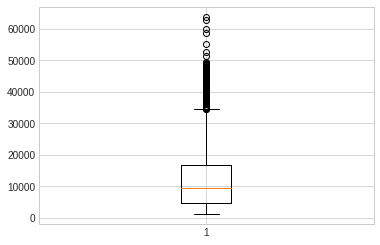

In [7]:
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

f, ax = plt.subplots(1,1)
ax.boxplot(insurance['charges']);

insurance['charges'].describe()

In [10]:
insurance_df_raw = insurance_df.drop(columns='charges')
insurance_df_raw = insurance_df_raw.drop(columns='target')
insurance_df_raw

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,0
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,2
4,32,0,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2
1334,18,1,31.920,0,0,3
1335,18,1,36.850,0,0,1
1336,21,1,25.800,0,0,0


#데이터 전처리

In [83]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet, OrthogonalMatchingPursuit, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

X_train, X_test , y_train, y_test = train_test_split(insurance_df_raw,insurance_df.target, test_size=0.3, random_state=100) 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

minmaxscaler 전처리

#머신러닝 모델 선정

In [89]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

print('전처리 전')
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

model = LinearRegression(normalize=True)
model.fit(X_train_scale, y_train)

print('')
print('전처리 후')
print('학습 데이터 점수: {}'.format(model.score(X_train_scale, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test_scale, y_test)))

전처리 전
학습 데이터 점수: 0.7020672573693341
평가 데이터 점수: 0.7512487499502136

전처리 후
학습 데이터 점수: 0.7020672573693341
평가 데이터 점수: 0.7506957968710029


In [62]:
model = Ridge(alpha=0.2)
model.fit(X_train, y_train)

print('전처리 전')
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

model = Ridge(alpha=0.2)
model.fit(X_train_scale, y_train)

print('')
print('전처리 후')
print('학습 데이터 점수: {}'.format(model.score(X_train_scale, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test_scale, y_test)))

전처리 전
학습 데이터 점수: 0.7020661363826155
평가 데이터 점수: 0.7512935007038064

전처리 후
학습 데이터 점수: 0.7020650753345792
평가 데이터 점수: 0.7507027486104656


In [63]:
model = Lasso(alpha=0.001)
model.fit(X_train, y_train)

print('전처리 전')
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

model = Lasso(alpha=0.001)
model.fit(X_train_scale, y_train)

print('')
print('전처리 후')
print('학습 데이터 점수: {}'.format(model.score(X_train_scale, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test_scale, y_test)))

전처리 전
학습 데이터 점수: 0.7020546555143117
평가 데이터 점수: 0.7514327536993276

전처리 후
학습 데이터 점수: 0.7019843994119401
평가 데이터 점수: 0.7505537619801425


In [64]:
model = ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(X_train, y_train)

print('전처리 전')
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

model = ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(X_train_scale, y_train)

print('')
print('전처리 후')
print('학습 데이터 점수: {}'.format(model.score(X_train_scale, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test_scale, y_test)))

전처리 전
학습 데이터 점수: 0.70057160627721
평가 데이터 점수: 0.751547133603405

전처리 후
학습 데이터 점수: 0.6974730228434218
평가 데이터 점수: 0.7457820238203227


In [65]:
model = OrthogonalMatchingPursuit(n_nonzero_coefs=3)
model.fit(X_train, y_train)

print('전처리 전')
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

model = OrthogonalMatchingPursuit(n_nonzero_coefs=3)
model.fit(X_train_scale, y_train)

print('')
print('전처리 후')
print('학습 데이터 점수: {}'.format(model.score(X_train_scale, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test_scale, y_test)))

전처리 전
학습 데이터 점수: 0.7000787590852533
평가 데이터 점수: 0.7513486625888768

전처리 후
학습 데이터 점수: 0.7000787590852533
평가 데이터 점수: 0.7509241174209125


In [66]:
model = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
)
model.fit(X_train, y_train)

print('전처리 전')
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

model = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
)
model.fit(X_train_scale, y_train)

print('')
print('전처리 후')
print('학습 데이터 점수: {}'.format(model.score(X_train_scale, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test_scale, y_test)))

전처리 전
학습 데이터 점수: 0.7607793207665604
평가 데이터 점수: 0.7825203954380845

전처리 후
학습 데이터 점수: 0.7630474693820211
평가 데이터 점수: 0.7816954772831176


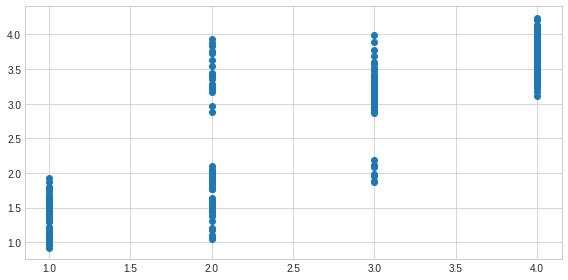

In [13]:
predicted = model.predict(X_test)
expected = y_test
plt.figure(figsize=(8,4))
plt.scatter(expected, predicted)
plt.tight_layout()

In [69]:
print('y = ' + str(model.intercept_) + ' ')
for i,c in enumerate(model.coef_):
  print(str(c) + ' * x' + str(i))

y = 4.343751981358323 
-0.9840557836933204 * x0
-0.02732254408724495 * x1
-0.6558229802560299 * x2
-0.07055215044874298 * x3
-1.988524834146552 * x4
-0.11265549219619667 * x5


#다양체학습

In [21]:
from sklearn import manifold, random_projection, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [30]:
def min_max_scale(x):
  min_value, max_value = np.min(x,0) , np.max(x,0)
  x = (x - min_value) / (max_value - min_value)
  return x

In [31]:
def plot_s_curve(s_curve, color, position, projection):
  s_curve = min_max_scale(s_curve)
  if projection == '3d':
    ax = plt.subplot(position, projection=projection)
    ax.scatter(s_curve[:,0], s_curve[:,1], s_curve[:,2],c=color, cmap= plt.cm.Spectral)
    ax.view_init(4,-72)
  elif projection == '2d':
    ax = plt.subplot(position)
    ax.scatter(s_curve[:,0], s_curve[:,1], c=color, cmap=plt.cm.Spectral)

In [32]:
def plot_insurance(insurance, labels, position, projection):
  insurance = min_max_scale(insurance)
  if projection == '3d':
    ax = plt.subplot(position, projection = projection)
    for i in range(insurance.shape[0]):
      ax.text(insurance[i,0],insurance[i,1],insurance[i,2], str(labels[i]),
              color=plt.cm.Set1(labels[i] / 10), fontdict={'weight':'bold','size':9})
    ax.view_init(4,-72)
  elif projection == '2d':
    ax = plt.subplot(position)
    for i in range(insurance.shape[0]):
      ax.text(insurance[i,0],insurance[i,1], str(labels[i]),
              color=plt.cm.Set1(labels[i] / 10), fontdict={'weight':'bold','size':9})

In [98]:
rand_proj = random_projection.SparseRandomProjection(n_components=3, random_state=0)
projected_digits = rand_proj.fit_transform(X_train_scale)

In [99]:
s_curve, color = datasets.make_s_curve(1000, random_state=0)
knn = KNeighborsClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

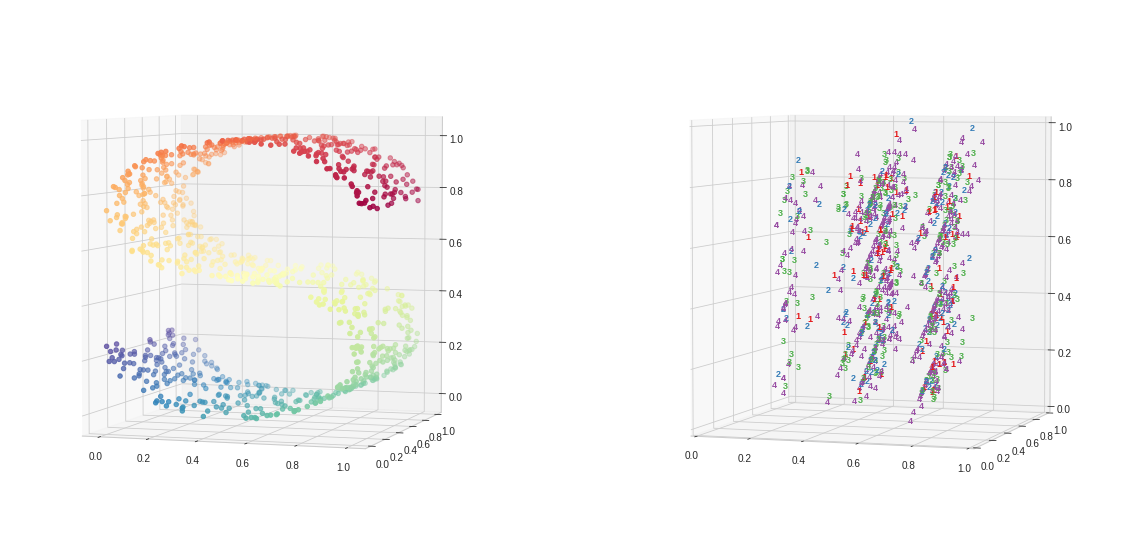

In [100]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve,color, 121, '3d')
plot_insurance(projected_digits, insurance_df.target, 122, '3d')

In [101]:
s_curve_lle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                              method='standard',random_state=0).fit_transform(s_curve)
insurance_lle = manifold.LocallyLinearEmbedding(n_neighbors=30,n_components=3,
                                             method='standard', random_state=0).fit_transform(X_train_scale)

In [103]:
insurance_lle = manifold.LocallyLinearEmbedding(n_neighbors=10,n_components=5,method='standard', random_state=0).fit_transform(X_train_scale)
insurance_ltsa = manifold.LocallyLinearEmbedding(n_neighbors=10,n_components=3,method='ltsa', random_state=0).fit_transform(X_train_scale)
insurance_mlle = manifold.LocallyLinearEmbedding(n_neighbors=10,n_components=3,method='modified', random_state=0).fit_transform(X_train_scale)
insurance_mds = manifold.MDS(n_components=3, random_state=0).fit_transform(X_train_scale)
insurance_spe = manifold.SpectralEmbedding(n_components=3, random_state=0).fit_transform(X_train_scale)
insurance_tsne = manifold.TSNE(n_components=3, random_state=0).fit_transform(X_train_scale)

/usr/local/lib/python3.6/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:937: LinAlgWarning: Diagonal number 572 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)


In [104]:
e = [knn, svm, decision_tree, random_forest]
h = [insurance_lle,insurance_ltsa,insurance_mlle,insurance_mds,insurance_spe,insurance_tsne]
g = ['lle','ltsa','mlle','mds','spe','tsne']
a = ['knn', 'svm', 'decision_tree', 'random_forest']

b=0
for r in e:
  print(a[b])
  score = cross_val_score(
    estimator = r,
    X=X_train, y=y_train,
    cv=5
  )
  print('학습 전 mean cross val score: {} (+/- {})'.format(score.mean(),score.std()))
  n=0
  for i in h:
    score = cross_val_score(
        estimator = r,
        X=i, y=y_train,
        cv=5
    )
    print('{} mean cross val score: {} (+/- {})'.format(g[n],score.mean(),score.std()))
    n += 1
  b+=1
  print('')


knn
학습 전 mean cross val score: 0.6635055182614632 (+/- 0.03382720051197216)
lle mean cross val score: 0.6282398452611219 (+/- 0.03262963571794732)
ltsa mean cross val score: nan (+/- nan)
mlle mean cross val score: 0.6026055296393219 (+/- 0.023275539545004026)
mds mean cross val score: 0.801302764819661 (+/- 0.027391019760574953)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn

spe mean cross val score: 0.7243713733075434 (+/- 0.023418220419675364)
tsne mean cross val score: 0.7863579474342929 (+/- 0.02520886751551132)

svm
학습 전 mean cross val score: 0.696603709181932 (+/- 0.010737534270093274)
lle mean cross val score: 0.6153999317328479 (+/- 0.021085216746697357)
ltsa mean cross val score: nan (+/- nan)
mlle mean cross val score: 0.6154113095915348 (+/- 0.02391976353844823)
mds mean cross val score: 0.7959665490954603 (+/- 0.021208600218883586)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn

spe mean cross val score: 0.6164751393787689 (+/- 0.022880576782521613)
tsne mean cross val score: 0.7853168733644329 (+/- 0.03252808018621338)

decision_tree
학습 전 mean cross val score: 0.8002332461030834 (+/- 0.019082419377604413)
lle mean cross val score: 0.5609170554101718 (+/- 0.035106518955948046)
ltsa mean cross val score: nan (+/- nan)
mlle mean cross val score: 0.6154113095915348 (+/- 0.02391976353844823)
mds mean cross val score: 0.7372454204118785 (+/- 0.03924031791172462)
spe mean cross val score: 0.6357094094891342 (+/- 0.03952830060535068)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn

tsne mean cross val score: 0.7190351575833429 (+/- 0.016438166998416527)

random_forest
학습 전 mean cross val score: 0.8686084878825804 (+/- 0.032808694252213444)
lle mean cross val score: 0.632517920127432 (+/- 0.034250446564232075)
ltsa mean cross val score: nan (+/- nan)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn

mlle mean cross val score: 0.6154113095915348 (+/- 0.02391976353844823)
mds mean cross val score: 0.8034474911821595 (+/- 0.017330910318824805)
spe mean cross val score: 0.7115485265673002 (+/- 0.01865988250178479)
tsne mean cross val score: 0.7949027193082261 (+/- 0.028359650002736717)



In [ ]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve_lle, color, 121, '2d')
plot_insurance(insurance_lle, insurance_df.target, 122, '3d')